In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Feynnlabs/Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Children_Breastfed_Total,Children_Received_Foods_Other_Than_Breast_Milk_Total,Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total
0,0,Assam,Barpeta,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5,36.1,41.6,36.1
1,1,Assam,Bongaigaon,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0,29.1,50.1,30.3
2,2,Assam,Cachar,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5,32.3,58.8,19.9
3,3,Assam,Darrang,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5,31.5,44.5,24.4
4,4,Assam,Dhemaji,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0,43.1,26.3,21.9


In [ ]:
df=pd.get_dummies(data=df,columns=["State"],drop_first=True)

In [ ]:
#enumerate data
dist={k:i for i,k in enumerate(df.District)}

In [ ]:
#map data
df.District=df.District.map(dist)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.shape

(284, 24)

In [ ]:
df.isna().sum()

District                                                   0
Population                                                 0
Children_Between_1_to_2_years                              0
Total_Arthritis_Patient                                    0
Arthritis_Patient_Male                                     0
Arthritis_Patient_Female                                   0
Children_Vaccinated                                        0
Children_Immunized                                         0
Children_Vaccinated_at_Birth                               0
Children_Not_Vaccinated                                    0
Total_Children_Weighted                                    0
Children_Weighted_less_than_2.5_Kg                         0
Women_Aged_15_49_years                                     0
Children_Breastfed_Total                                   0
Children_Received_Foods_Other_Than_Breast_Milk_Total       0
Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total    0
State_Bihar             

In [ ]:
#define scalar 
scalar=StandardScaler()
#transform data
data=scalar.fit_transform(df)

In [ ]:
data

array([[-1.72596274, -0.24835223, -0.29139867, ..., -0.35634832,
        -0.57192902, -0.21902164],
       [-1.71376512,  0.25511037, -0.23674954, ..., -0.35634832,
        -0.57192902, -0.21902164],
       [-1.7015675 ,  1.37447537,  1.98883614, ..., -0.35634832,
        -0.57192902, -0.21902164],
       ...,
       [ 1.7015675 ,  3.40889908,  2.83384826, ..., -0.35634832,
        -0.57192902,  4.56575885],
       [ 1.71376512,  0.44984345,  0.26670554, ..., -0.35634832,
        -0.57192902,  4.56575885],
       [ 1.72596274,  0.06406128, -0.54483399, ..., -0.35634832,
        -0.57192902,  4.56575885]])

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

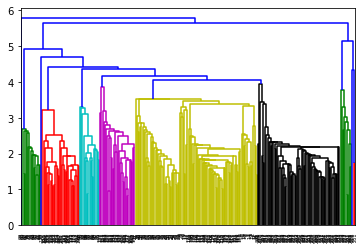

In [ ]:
# Single linkage: 
mergings = linkage(data, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

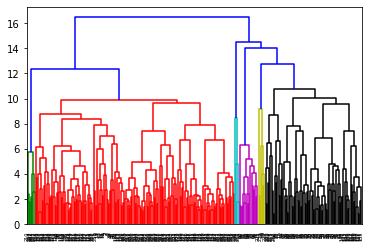

In [ ]:
# Complete linkage

mergings = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

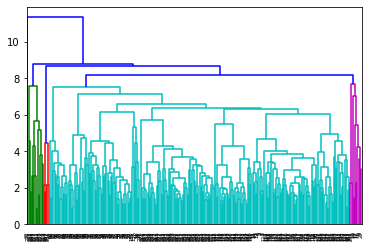

In [ ]:
# Average linkage

mergings = linkage(data, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

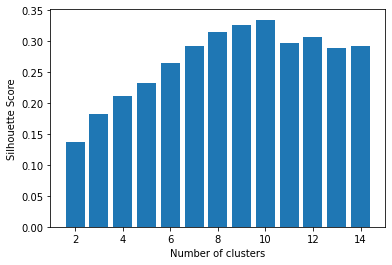

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Predict data
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

In [ ]:
y_hc

array([2, 2, 1, 2, 2, 2, 8, 2, 8, 2, 8, 1, 8, 2, 2, 2, 1, 8, 2, 2, 8, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6,
       6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 1, 9, 9, 1, 9, 9, 1, 9, 9])

In [ ]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
#plot graph
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='Purple', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='black', label='Cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1], s=50, c='white', label='Cluster 7')
plt.scatter(X[Y==7,0], X[Y==7,1], s=50, c='pink', label='Cluster 8')
plt.scatter(X[Y==8,0], X[Y==8,1], s=50, c='Brown', label='Cluster 9')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('District')
plt.ylabel('Potential market')
plt.show()